<a href="https://colab.research.google.com/github/DeniseVelarde/Estudos-sobre-Machine-Learning/blob/main/Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Para Redes Neurais com TensorFlow e Keras
import tensorflow as tf
from tensorflow import keras

# Para modelos clássicos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Para manipulação de dados e visualização
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para garantir que os resultados sejam reproduzíveis
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#carregando o dataset que já existe
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

#nomes das classes para facilitar a visualização
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Verificando a forma dos dados
print("Formato dos dados de treino (imagens):", x_train.shape)
print("Formato dos dados de treino (rótulos):", y_train.shape)
print("Formato dos dados de teste (imagens):", x_test.shape)
print("Formato dos dados de teste (rótulos):", y_test.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Formato dos dados de treino (imagens): (60000, 28, 28)
Formato dos dados de treino (rótulos): (60000,)
Formato dos dados de teste (imagens): (10000, 28, 28)
Formato dos dados de teste (rótulos): (10000,)


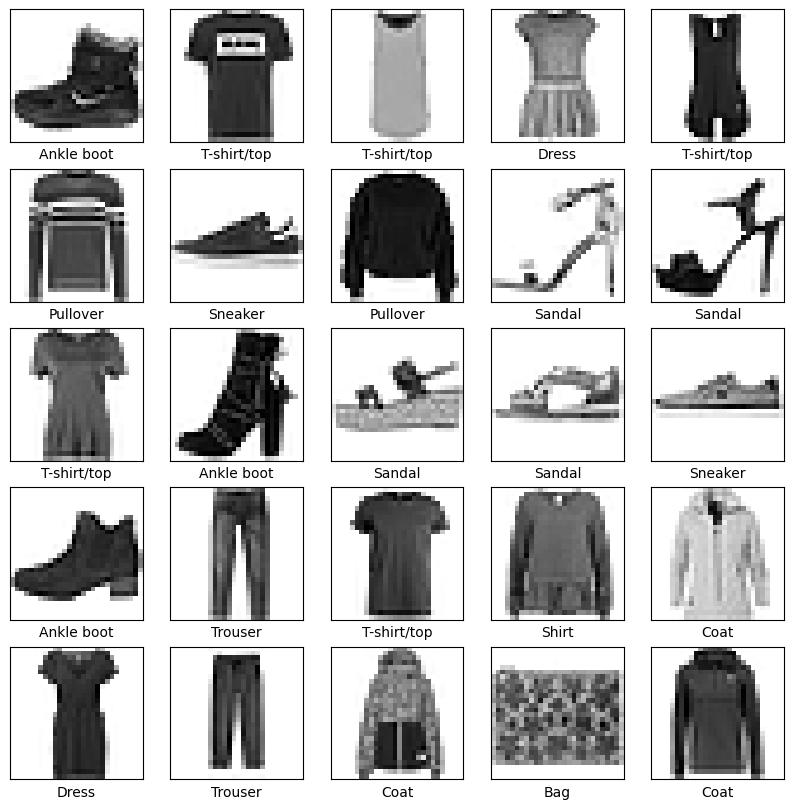

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
#Pré-processamento para Árvore de Decisão e Random Forest
#Achatar as imagens de 28x28 para um vetor de 784
x_train_flat = x_train.reshape(x_train.shape[0], 28 * 28)
x_test_flat = x_test.reshape(x_test.shape[0], 28 * 28)

print("Formato dos dados achatados (treino):", x_train_flat.shape)

#Pré-processamento para a Rede Neural
#normalizar os valores dos pixels para o intervalo [0, 1]
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

Formato dos dados achatados (treino): (60000, 784)


Treinando a Árvore de Decisão...
Treinamento concluído!

Acurácia da Árvore de Decisão: 0.7890


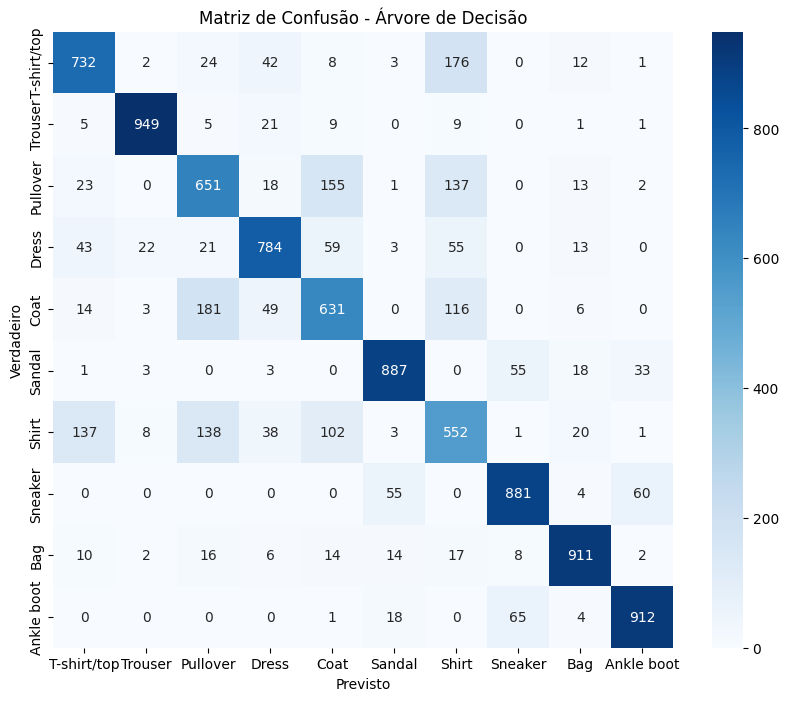

In [ ]:
#Criando e treinando o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
print("Treinando a Árvore de Decisão...")
dt_model.fit(x_train_flat, y_train)
print("Treinamento concluído!")

#Fazendo previsões no conjunto de teste
y_pred_dt = dt_model.predict(x_test_flat)

#Avaliando o desempenho
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nAcurácia da Árvore de Decisão: {accuracy_dt:.4f}")

#Matriz de Confusão
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

Treinando o Random Forest...
Treinamento concluído!

Acurácia do Random Forest: 0.8760


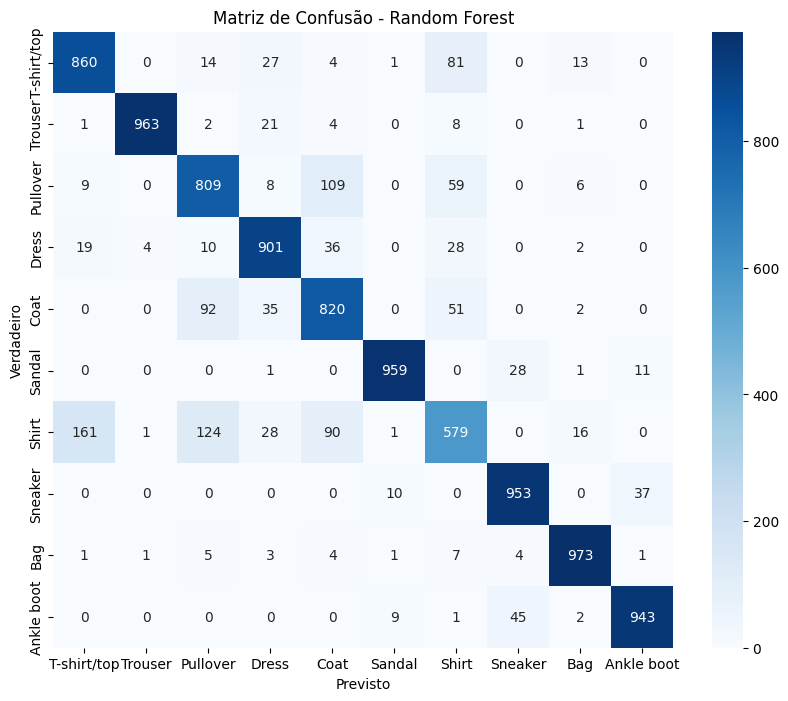

In [ ]:
#Criando e treinando o modelo Random Forest
#n_estimators=100 significa que vamos usar 100 árvores
#n_jobs=-1 usa todos os processadores disponíveis para acelerar o treino
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("Treinando o Random Forest...")
rf_model.fit(x_train_flat, y_train)
print("Treinamento concluído!")

#Fazendo previsões
y_pred_rf = rf_model.predict(x_test_flat)

#Avaliando o desempenho
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAcurácia do Random Forest: {accuracy_rf:.4f}")

#Matriz de Confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão - Random Forest')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Treinando a Rede Neural...
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7768 - loss: 0.6392 - val_accuracy: 0.8483 - val_loss: 0.4080
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8567 - loss: 0.3988 - val_accuracy: 0.8623 - val_loss: 0.3693
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8708 - loss: 0.3504 - val_accuracy: 0.8668 - val_loss: 0.3621
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8803 - loss: 0.3228 - val_accuracy: 0.8707 - val_loss: 0.3575
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8875 - loss: 0.3030 - val_accuracy: 0.8718 - val_loss: 0.3521
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8950 - loss: 0.2840 - val_accuracy: 0.8720 - val_loss: 0.3605
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9024 - loss: 0.2693 - val_accuracy: 0.8753 - val_loss: 0.3591
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accu

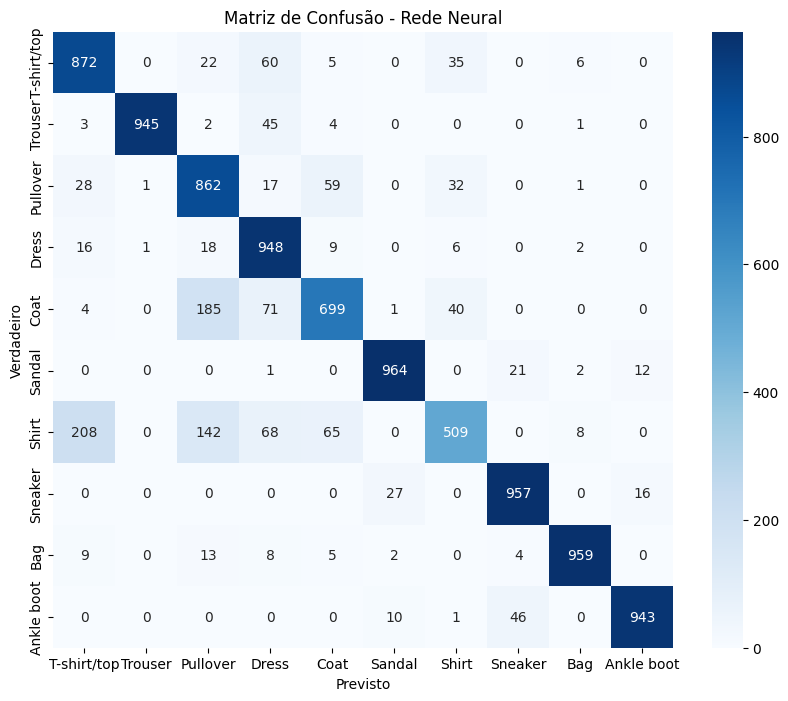

In [ ]:
# Construindo a arquitetura da Rede Neural
nn_model = keras.Sequential([
    #Camada de entrada que achata a imagem 28x28 para um vetor de 784
    keras.layers.Flatten(input_shape=(28, 28)),

    #Camada oculta densa com 128 neurônios e ativação ReLU
    keras.layers.Dense(128, activation='relu'),

    #Camada de saída com 10 neurônios (um para cada classe) e ativação softmax
    # Softmax transforma os logits em probabilidades para cada classe
    keras.layers.Dense(10, activation='softmax')
])

# Compilando o modelo
nn_model.compile(optimizer='adam',
                 # para rótulos inteiros
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Sumário do modelo
nn_model.summary()

# Treinando a Rede Neural
print("\nTreinando a Rede Neural...")
history = nn_model.fit(x_train_norm, y_train, epochs=10, validation_split=0.1)
print("Treinamento concluído!")

# Avaliando o modelo no conjunto de teste
test_loss, accuracy_nn = nn_model.evaluate(x_test_norm, y_test, verbose=2)
print(f"\nAcurácia da Rede Neural: {accuracy_nn:.4f}")

# Fazendo previsões para a matriz de confusão
y_pred_nn_prob = nn_model.predict(x_test_norm)
y_pred_nn = np.argmax(y_pred_nn_prob, axis=1) # Pega a classe com a maior probabilidade

# Matriz de Confusão
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão - Rede Neural')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()